In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from keras import metrics
from keras.models import model_from_json
from keras.callbacks import Callback
from keras import optimizers
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [12]:
mnist_folder = "../mnist"
op_folder = "./result/mnist"
X_train = np.load(mnist_folder + "/x_train.npy")
y_train = np.load(mnist_folder + "/y_train.npy")
X_test = np.load(mnist_folder + "/x_test.npy")
y_test = np.load(mnist_folder + "/y_test.npy")

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train.shape

(60000, 28, 28, 1)

In [14]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, strides=1, activation="relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=1, strides=1, activation="relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=1))
model.add(Flatten())
print (model.output_shape)
model.add(Dense(1024, activation="relu"))
model.add(Dropout(rate=0.45))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

sgd = optimizers.SGD(lr=0.03, decay=1e-5)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.compile(optimizer=sgd, loss="mean_squared_error", metrics=['accuracy'])
print (model.output_shape)


(None, 20000)
(None, 10)


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0380 - acc: 0.7164 - val_loss: 0.0117 - val_acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 311s 5ms/step - loss: 0.0142 - acc: 0.9047 - val_loss: 0.0077 - val_acc: 0.9501
Epoch 3/5
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0105 - acc: 0.9316 - val_loss: 0.0062 - val_acc: 0.9599
Epoch 4/5
60000/60000 [==============================] - 313s 5ms/step - loss: 0.0088 - acc: 0.9437 - val_loss: 0.0054 - val_acc: 0.9657
Epoch 5/5
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0073 - acc: 0.9531 - val_loss: 0.0049 - val_acc: 0.9700


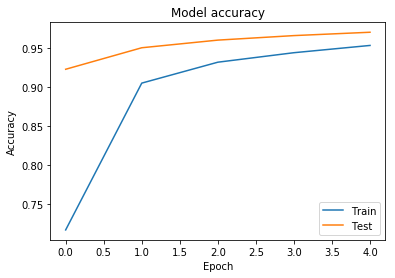

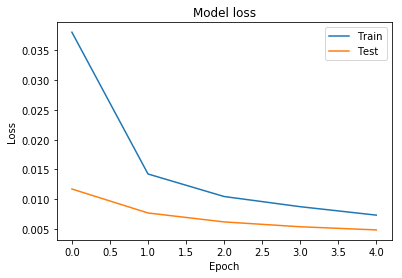

In [15]:
if not os.path.exists(op_folder):
    os.makedirs(op_folder)
    
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=300)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(op_folder + "/accuracy.png", bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(op_folder + "/loss.png", bbox_inches='tight')
plt.show()

In [16]:
# Final evaluation of the model
y_pred = model.predict(X_test)


In [17]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fscore = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

np.savetxt(op_folder + "/confusion_matrix.txt", cm, fmt="%d")
with open(op_folder + "/scores.txt", 'w') as the_file:
    the_file.write("Accuracy " + str(accuracy) + 
                  "\nPrecision " + str(precision) + 
                  "\nRecall " + str(recall) +
                  "\nFscore " + str(fscore))

print ("Accuracy " + str(accuracy) + 
      "\nPrecision " + str(precision) + 
      "\nRecall " + str(recall) +
      "\nFscore " + str(fscore))

Accuracy 0.97
Precision 0.9697612482414504
Recall 0.9698275723132953
Fscore 0.9697601571416978
